In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns# data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk(r'C:\Users\Vanshika Singh\Documents\ipl_analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\Vanshika Singh\Documents\ipl_analysis\deliveries.csv
C:\Users\Vanshika Singh\Documents\ipl_analysis\desktop.ini
C:\Users\Vanshika Singh\Documents\ipl_analysis\ipl-match-analysis.ipynb
C:\Users\Vanshika Singh\Documents\ipl_analysis\ipl.ipynb
C:\Users\Vanshika Singh\Documents\ipl_analysis\matches.csv
C:\Users\Vanshika Singh\Documents\ipl_analysis\.ipynb_checkpoints\ipl-checkpoint.ipynb
C:\Users\Vanshika Singh\Documents\ipl_analysis\.ipynb_checkpoints\ipl-match-analysis-checkpoint.ipynb


In [56]:
delivery_data=pd.read_csv(r'C:\Users\Vanshika Singh\Documents\ipl_analysis\deliveries.csv') # Bowl by Bowl data

match_data=pd.read_csv(r'C:\Users\Vanshika Singh\Documents\ipl_analysis\matches.csv')# IPL(Indian premier League) Match Data from 2008 and 2016.

In [57]:
match_data.head()
# match_data.loc[match_data.season==2017]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [58]:
match_data.shape

(636, 18)

In [59]:
biggest_win=match_data['win_by_runs'].max()
teams_biggest_win=[]

f=match_data.loc[match_data['win_by_runs']==biggest_win]

teams_biggest_win.append((str(f['season'].tolist()[0])))

teams_biggest_win.append((str(f['venue'].tolist()[0])))

teams_biggest_win.append(str(f['team1'].tolist()[0]))

teams_biggest_win.append(str(f['team2'].tolist()[0]))


teams_biggest_win.append(str(f['winner'].tolist()[0]))


tie_matches_no=match_data.loc[match_data['result']=='tie']



In [60]:
f=match_data.loc[match_data['dl_applied']==1]
season_number=f['season'].value_counts()
dl_stadium=f['venue'].value_counts()

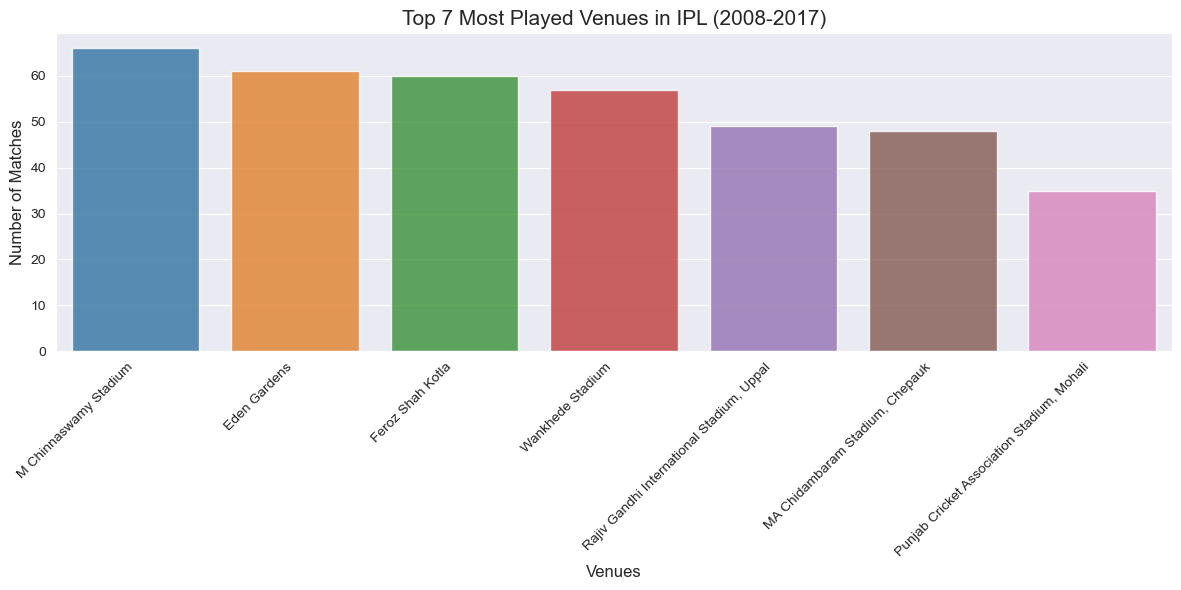

In [61]:


if 'venue' in match_data.columns:
    # Calculate the count of matches played at each venue
    venue_counts = match_data['venue'].value_counts().sort_values(ascending=False)
    
    # Select top 7 venues
    top_venues = venue_counts.head(7)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_venues.index, y=top_venues.values, alpha=0.8)
    
    plt.title('Top 7 Most Played Venues in IPL (2008-2017)', fontsize=15)
    plt.xlabel('Venues', fontsize=12)
    plt.ylabel('Number of Matches', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    
    plt.show()
else:
    print("Error: 'venue' column not found in match_data.")

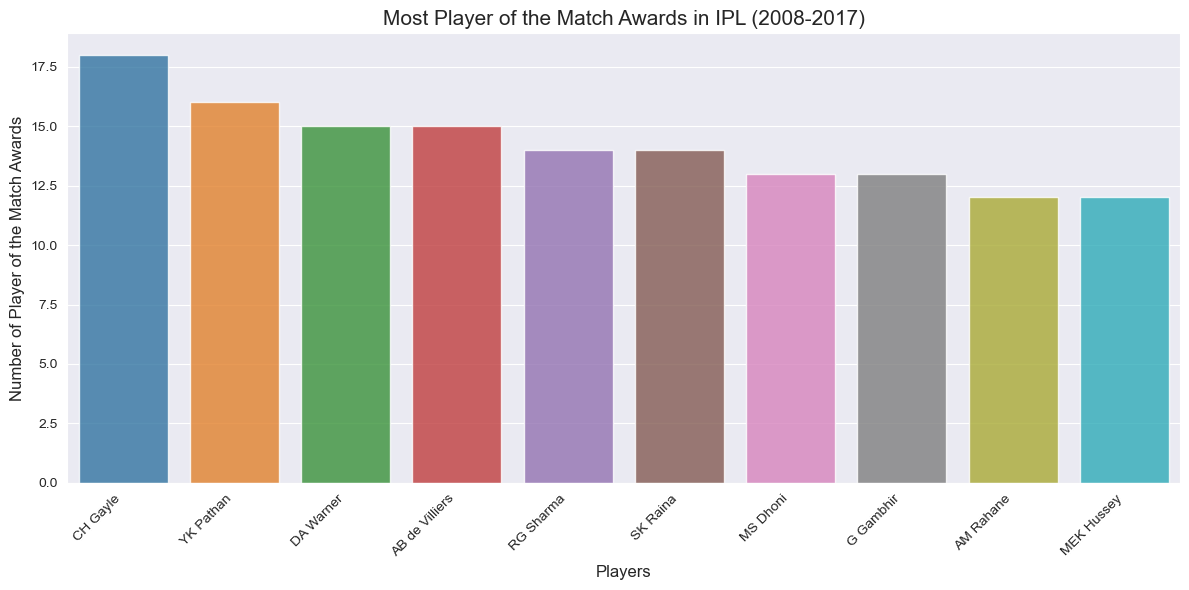

In [62]:
if 'player_of_match' in match_data.columns:
    # Calculate the count of Player of the Match awards per player
    player_counts = match_data['player_of_match'].value_counts().sort_values(ascending=False)
    
    # Select top players (adjust the number if needed)
    top_players = player_counts.head(10)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_players.index, y=top_players.values, alpha=0.8)
    
    plt.title('Most Player of the Match Awards in IPL (2008-2017)', fontsize=15)
    plt.xlabel('Players', fontsize=12)
    plt.ylabel('Number of Player of the Match Awards', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    
    plt.show()
else:
    print("Error: 'player_of_match' column not found in match_data.")


Text(0.5, 0, 'Season')

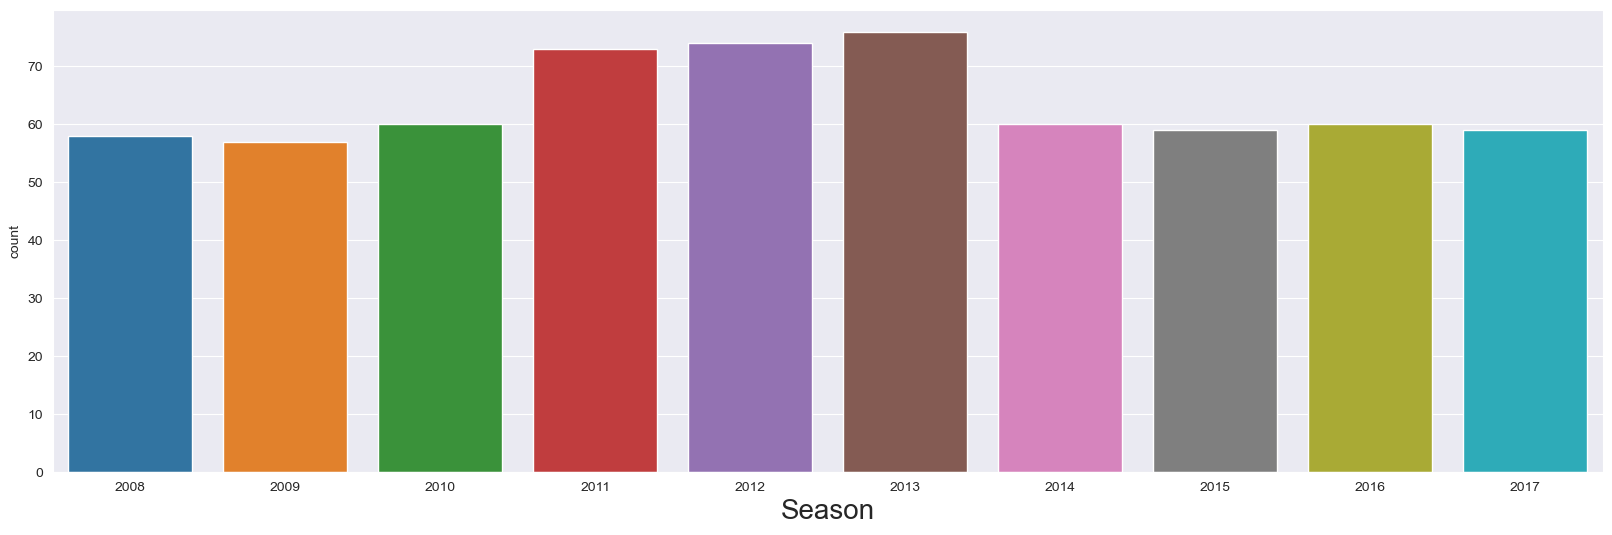

In [63]:
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=match_data)
plt.xlabel('Season',fontsize=20)

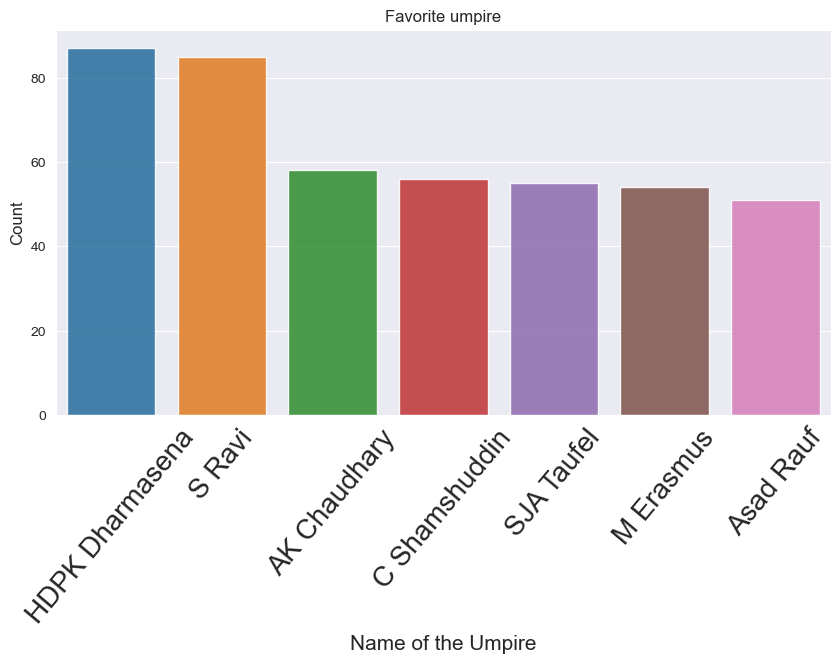

In [64]:
ump=pd.concat([match_data['umpire1'],match_data['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:7]
plt.figure(figsize=(10,5))
Most_umpired =sns.barplot(x=ump.index, y=ump.values, alpha=0.9)

plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=50,labels=ump.index,fontsize=20)
plt.show()




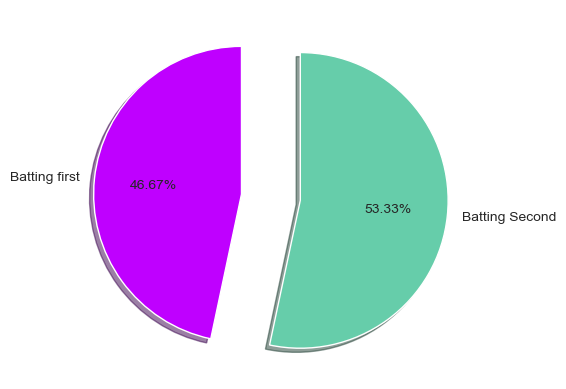

In [65]:
Delhi_stadium=match_data.loc[(match_data['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])
plt.show()

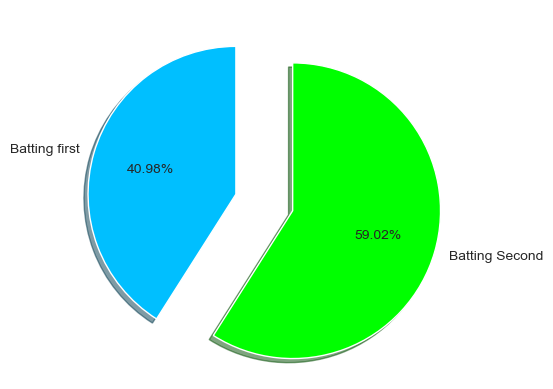

In [66]:
Kolkata_stadium=match_data.loc[(match_data['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

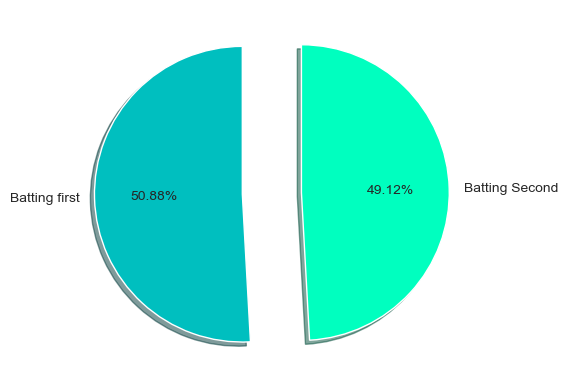

In [67]:
Mumbai_stadium=match_data.loc[(match_data['venue']=='Wankhede Stadium') ]
Mumbai_stadium_win_by_runs=Mumbai_stadium[Mumbai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Mumbai_stadium_win_by_runs),len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfbf','#00ffbf'])
plt.show()


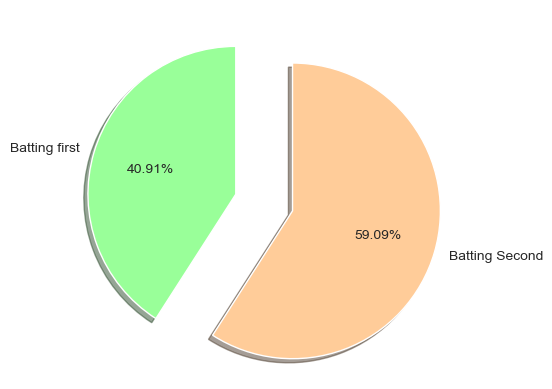

In [68]:
M_Chinnaswamy_Stadium=match_data.loc[(match_data['venue']=='M Chinnaswamy Stadium') ]
M_Chinnaswamy_Stadium_win_by_runs=M_Chinnaswamy_Stadium[M_Chinnaswamy_Stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(M_Chinnaswamy_Stadium_win_by_runs),len(M_Chinnaswamy_Stadium)-len(M_Chinnaswamy_Stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

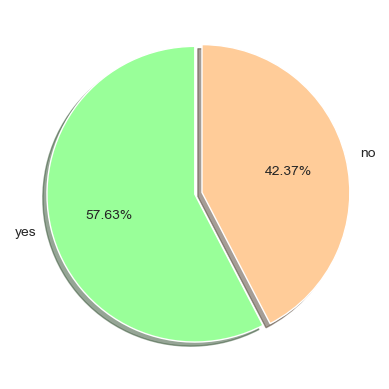

In [69]:
# Analysis for year 2017
match_2017=match_data[match_data['season']==2017]
df=match_2017[match_2017['toss_winner']==match_2017['winner']]
slices=[len(df),(59-len(df))]# because Toal 59 matches were played in 2017
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

# YES,In 2017 if a team won the toss they had slightly better chances to win the match
# Trends in 2017 after winning the toss

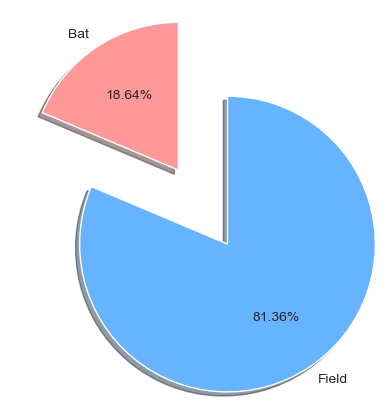

In [70]:
dfs=match_data[(match_data['toss_decision']=='field') & (match_data['season']==2017) ]
labels=['Bat','Field']
slices=[59-len(dfs),len(dfs)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

# Teams winning toss in 2017 majorly decide to Field first.

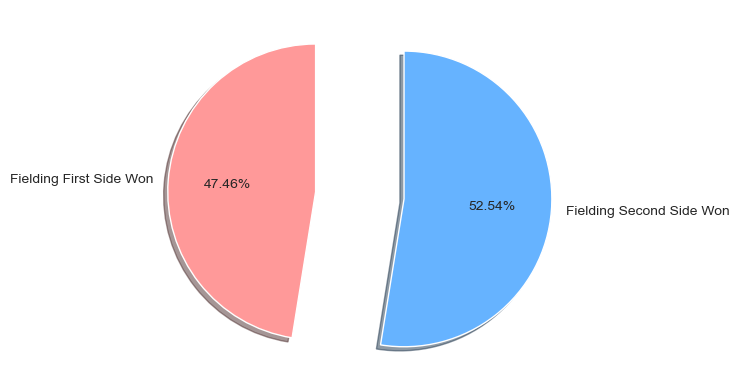

In [71]:

dfd=match_2017[(match_2017['toss_decision']=='field') & (match_2017['toss_winner']==match_2017['winner'])]
labels=['Fielding First Side Won','Fielding Second Side Won']
slices=[len(dfd),59-len(dfd)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

In [72]:
# Team1 vs Team 2
def comparator(team1):
    teams=list(match_data.team1.unique())# you can take team2 here also 
    teams.remove(team1)
    opponents=teams.copy()
    mt1=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))# each time comparing each opponent team and the team we are looking for
#         print(mask)
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T# to_frame to convert to DataFrame and T is used to Transpose
        print(mt2)


In [73]:
comparator('Mumbai Indians')

winner  Mumbai Indians  Sunrisers Hyderabad
count                5                    5
winner  Mumbai Indians  Gujarat Lions
count                2              2
winner  Rising Pune Supergiant  Mumbai Indians
count                        3               1
winner  Mumbai Indians  Royal Challengers Bangalore
count               13                            8
winner  Mumbai Indians  Kolkata Knight Riders
count               16                      5
winner  Mumbai Indians  Delhi Daredevils
count               11                 9
winner  Mumbai Indians  Kings XI Punjab
count               10               10
winner  Mumbai Indians  Chennai Super Kings
count               12                   10
winner  Mumbai Indians  Rajasthan Royals
count               10                 6
winner  Mumbai Indians  Deccan Chargers
count                6                4
winner  Kochi Tuskers Kerala
count                      1
winner  Mumbai Indians  Pune Warriors
count                5              1


In [74]:
# BALL BY BALL OBSERVATION
print(delivery_data.shape)
print(delivery_data.columns)

(150460, 21)
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [75]:
delivery_data.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [76]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [77]:
# most maidens in 2017
match_data.loc[match_data.season==2017].shape# this shows 59 matches were played in season 2017

most_maidens=delivery_data.groupby(['match_id','inning','over'])

# most_maidens.first()
list_of_most_maidens=[]
for match in range(1,60): # to iterate over each match total 59 matches
    for inning in range(1,3):# to iterate over each innings there are 2 innings in a match
        for over in range(1,21):# to iterate over maximum 20 overs in an innings
            
            try:# try block beacuse not every inning or every match is perfectly divided into 2 innings of 20 overs each in some matches due to rain or some other reason overswere reduced 
                #or even innings was dismissed
                if ((most_maidens.get_group((match,inning,over))['wide_runs'].sum()>0) + 
                    (most_maidens.get_group((match,inning,over))['noball_runs'].sum()>0)==most_maidens.get_group((match,inning,over))['total_runs'].sum()):
                    bowler=list(most_maidens.get_group((match,inning,over))['bowler'].unique())[0]
                    list_of_most_maidens.append(bowler)
                else:
                    pass
            except:
                continue


from statistics import mode 
def most_common(List): 
    return(mode(List)) 
    
print(str(most_common(list_of_most_maidens))+ " bowled most " + str(list_of_most_maidens.count(most_common(list_of_most_maidens))) + " maiden overs in 2017")                      


JD Unadkat bowled most 3 maiden overs in 2017
